In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

## Linear regression model prediction

$y = \theta_0x_0 + \theta_1x_1 + \theta_2x_2 + .... + \theta_nx_n$

This can be written much more concisely using a vectorized form as shown below:

$y = h_{\theta}(x) = \theta.x$

- $\theta$ is the model's parameter vector, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$

add $x_0 = 1$ to each instance to create $x_b$ 

In [34]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.00499775]
 [2.8540897 ]]


We expected $\theta_{0}$ to be 4 and $\theta_{1}$ to be 3. Close enough, but the gaussian noise made it impossible to recover the exact parameters of the original function.

Now predicting the value of y using the theta_best

In [37]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new] # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
print(y_predict)

[[4.00499775]
 [9.71317716]]


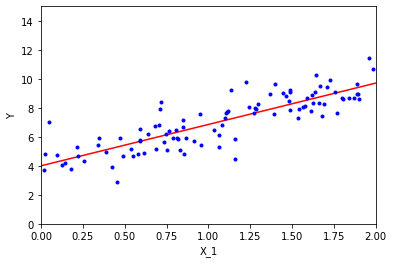

In [48]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.xlabel("X_1")
plt.ylabel("Y")
plt.axis([0,2,0,15])
plt.show()

The LinearRegression class is based on the np.linalg.lstsq() function which you could call directly. 

This function computes $\theta = X^+ y $, where $X^+$ is the **pseudoinverse** of X. You can use np.linalg.pinv() to compute the pseudo inverse directly.

In [50]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y,rcond = 1e-6)
theta_best_svd

array([[4.00499775],
       [2.8540897 ]])

In [51]:
np.linalg.pinv(X_b).dot(y)

array([[4.00499775],
       [2.8540897 ]])

The pseudoinverse itself is computed using a standard matrix factorization technique called **Singular Value Decomposition (SVD)** that can decompose the training set matrix X into the matrix multiplication of three matrices $ U, \sum, V^T$. The pseudoinverse is computed as $X^+ = V\sum^{+}U^T$.

The normal equation may not work if the matrix $X^TX$ is not invertible (i.e singular). Hence SVD method is normally used to calculate theta_best.

##### Computational Complexity
The normal equation for finding theta best is:  


$\theta = (X^TX)^{-1}X^Ty$

This equation computes the inverse of $X^TX$ which is an $(n+1)*(n+1)$ matrix (where n is the number of features). The *Computational complexity* of inverting such a matrix is typically about $O(n^{2.4})$ to $O(n^3)$ depending upon the implementation.  

The SVD approach used by Scikit-Learn's LinearRegression class is about $O(n^2)$. 


## Gradient Descent
### 1) Batch Gradient Descent
Now we will look at very different ways to train a Linear Regression model, better suited for cases where there are a large number of features, or too many training instances to fit in memory. 

The idea of Gradient Descent is to tweak parameters ($\theta$) iteratively in order to minimize a cost function.  

You can calculate the gradient descent using the following formula on the go.
$MSE(\theta) = \frac{2}{m} X^T(X\theta - y)$

and use this gradient to tweak the parameters ($\theta$)  

$ \theta^{(next step)} = \theta - \eta * MSE(\theta) $

where $\eta$ (eta) is the learning rate.


In [60]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) #random initialization of theta

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

print(theta)

[[4.00499775]
 [2.8540897 ]]


### 2) Stochastic Gradient Descent
The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. 

However, **Stochastic gradient descent** just picks a random instance in the training set at every step and computes the gradients based only on that single instance. This makes it possible to train on huge datasets, since only one instance needs to be in memory at each iteration.

Because of stochastic nature, the algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Overtime it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. So once the algorithm stops, the final parameter value are good, but not optimal. 

- When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so SGD has a better chance of finding the global minimum than BGD.

To solve SGD problem, we can gradually reduce the learning rate. The step starts out with large learning rate, and then gets smaller and smaller, allowing the algorithm to settle at global minima. The function that determines the learning rate at each iteration is called the **learning schedule**. 

The implementation of SGD is below:

In [84]:
n_epochs = 50
t0,t1 = 5,50 # learning schedule hyperparameters. 

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [85]:
theta

array([[4.01093715],
       [2.85442046]])